In [243]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
db

In [244]:
db = sqlite3.connect("IMDB_1.sqlite")
db

In [245]:
db = sqlite3.connect('School_1.sqlite')
db

In [246]:
cur = db.cursor()
cur

In [247]:
sql_query = 'create table student(RollNumber int primary key,Name Text,Age int)'
cur.execute(sql_query)

OperationalError: table student already exists

In [ ]:
cur.execute("insert into student values (101,'Aman',20)")

In [ ]:
db.commit()

In [ ]:
cur.execute("insert into student values(102,'Amit',21)")

In [ ]:
db.commit()

In [ ]:
db.close()

In [ ]:
cur.execute("insert into student values(103,'Soma',22)")

In [ ]:
db1 = sqlite3.connect("employee.sqlite")
db1

In [ ]:
cur1 = db1.cursor()
cur1

In [ ]:
sql_query1 = cur1.execute("create table EmployeeDetail(employeeid int primary key,Name Text,Age int,Department Text,salary int)")
sql_query1

In [ ]:
cur1.execute("insert into employeeDetail values(100,'Rishav',25,'Marketing',50000)")

In [ ]:
cur1.execute("insert into employeeDetail values(101,'Abhishek',26,'Operations',60000)")

In [ ]:
cur1.execute("insert into employeeDetail values(102,'Aman',24,'Human Resource',75000)")

In [ ]:
db1.commit()

In [ ]:
db = sqlite3.connect('school_1.sqlite')
db

In [ ]:
cur = db.cursor()
cur

In [ ]:
cur.execute('insert into student values(103,"Mohit",24)')


In [ ]:
rollNumber = 104
Name = 'Nikhil'
age = 34
# Here ? is used as a placeholder
cur.execute("insert into student values(?,?,?)",(rollNumber,Name,age))

In [ ]:
db.commit()

In [ ]:
values = [(105,'Nidhi',20),(106,'Manisha',21),(107,'Ankush',22)]
cur.executemany("insert into student values(?,?,?)",values)

In [ ]:
db.commit()

In [ ]:
cur.execute('update student set age = 30')

In [ ]:
db.commit()

In [ ]:
cur.execute('update student set age = 20 where rollNumber = 102')

In [ ]:
db.commit()

In [ ]:
new_age = 50
cur.execute('update student set age = ? where rollNumber = 103',(new_age,))

In [ ]:
db.commit()

In [ ]:
cur1.execute('delete from employeeDetail where employeeid = 101')

In [ ]:
db1.commit()

In [ ]:
employeeid = 102
cur1.execute('delete from employeeDetail where employeeid = ?',(employeeid,))

In [ ]:
db1.commit()

In [ ]:
## Open and read data file as specified in the question
## Print the required output in given format
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]
values = [(employee_id,name,age,department,salary)]
for i in range(1,len(employee_id)):
    cur1.execute("insert into employeeDetail values(?,?,?,?,?)",(employee_id[i],name[i],age[i],department[i],salary[i]))

In [ ]:
db1.commit()

In [ ]:
db2 = sqlite3.connect("school.sqlite")
db2

In [ ]:
cur2 = db2.cursor()

In [ ]:
cur2.execute('select * from student')

In [ ]:
for row in cur2:
    print(row)

In [ ]:
cur2.execute('select * from student')
print(cur2.fetchone())
print(cur2.fetchone())

In [ ]:
cur2.execute('select * from student')
print(cur2.fetchmany(3))
print(cur2.fetchmany())

In [ ]:
cur2.execute('select * from student')
ans = cur2.fetchall()
ans

In [ ]:
cur2.execute('select * from student where rollNumber > 103')
print(cur2.fetchall())

In [ ]:
cur2.execute('select * from student where name like "A%"')
cur2.fetchall()

In [ ]:
cur1.execute('select * from employeedetail where department = "Finance"')
cur1.fetchall()

In [ ]:

cur1.execute("select distinct department,count(distinct department) from employeedetail")


In [ ]:
import pandas as pd
import sqlite3

In [ ]:
db = sqlite3.connect('school.sqlite')

In [ ]:
data = pd.read_sql_query("select * from student",db)
data

In [ ]:
data[data['Age'] == 30]

In [ ]:
data = pd.DataFrame([[201,'Aman','English',20000],[202,'Komal','Maths',22000],[203,'Mahesh','Science',23000]]
                   ,columns = ['ID','Name','Course','Salary'])
data

In [ ]:
data.to_sql('Faculty_1',db)

In [248]:
data = pd.read_sql_query('select * from student',db)
data['Marks'] = 80
data.to_sql('Student',db,if_exists = 'replace')

OperationalError: table "Student" already exists

In [ ]:
db.commit()

In [ ]:
db3 = sqlite3.connect("IMDB.sqlite")
db3

In [ ]:
cur3 = db3.cursor()

In [ ]:
data = pd.read_sql_query('select *,count(genre) from genre group by genre',db3)
data

In [ ]:
ans = cur3.execute('select genre,count(genre) from genre group by genre')
for i in cur3:
    print(i[0],i[1])

In [251]:
data = pd.read_sql_query('select * from earning',db3)
data['total'] = data['Domestic'] + data['Worldwide'] 
data.to_sql('earning',db3,if_exists = 'replace')
data

,index,Movie_id,Domestic,Worldwide,total
0,0,36809,56671993,1.877332e+08,2.444052e+08
1,1,30114,18335230,6.073880e+07,7.907403e+07
2,2,37367,35014192,3.918778e+07,7.420198e+07
3,3,49473,15322921,8.710045e+07,1.024234e+08
4,4,14867,6739492,1.983949e+07,2.657898e+07
...,...,...,...,...,...
112,112,38262,13092000,4.898204e+07,6.207404e+07
113,113,10023,189422889,4.712229e+08,6.606458e+08
114,114,27783,233921534,7.478628e+08,9.817843e+08
115,115,42294,146408305,3.536241e+08,5.000324e+08


In [254]:
data = pd.read_sql_query('select rating,max(total) from IMDB join earning on IMDB.movie_id = earning.movie_id group by rating',db3)
data

,Rating,max(total)
0,7.5,2.798985e+08
1,7.6,1.289680e+09
2,7.7,1.256267e+09
3,7.8,1.412921e+09
4,7.9,1.588235e+09
5,8.0,1.146184e+09
6,8.1,3.004886e+09
7,8.2,1.214073e+09
8,8.3,1.481975e+09
9,8.4,1.533078e+09


In [281]:
cur3.execute('select rating,max(total) from IMDB join earning on IMDB.movie_id = earning.movie_id')
for i in cur3:
    print(i[0])

8.1


In [273]:
data = pd.read_sql_query('select * from employeedetail',db1)
data

,employeeid,Name,Age,Department,salary
0,100,Rishav,25,Marketing,50000
1,101,Aadarsh,25,Marketing,50000
2,102,Aarti,27,Operations,60000
3,103,Siddharth,25,Finance,85000
4,104,Aman,24,Human Resource,75000
5,105,Amit,30,Marketing,50000
6,106,Shivansh,26,IT,90000
7,107,Vaibhav,23,Finance,85000
8,108,Himanshu,26,IT,90000
9,109,Raman,25,Operations,60000


In [280]:
cur1.execute('select department,count(department) from employeedetail group by department order by count(department) desc')
for i in cur1:
    print(i[0],i[1])

Marketing 5
Operations 2
IT 2
Human Resource 2
Finance 2


In [282]:
# Marketing 4
# Operations 2
# Finance 2
# Human Resource 2
# IT 2

In [298]:
data = pd.read_sql_query('select title,max(totalVotes),rating from IMDB group by totalVotes',db3)
data

,Title,max(totalVotes),Rating
0,Tyrannosaur (2011),26016,7.6
1,"I, Daniel Blake (2016)",28350,7.9
2,Pride (2014),40577,7.8
3,The Little Prince (2015),40777,7.8
4,Sing Street (2016),56066,8.0
...,...,...,...
112,The Avengers (2012),1056773,8.1
113,Django Unchained (2012),1056822,8.4
114,Interstellar (2014),1075163,8.6
115,The Dark Knight Rises (2012),1240780,8.4


In [302]:
cur3.execute('select title,max(totalVotes),rating from IMDB')
for i in cur3:
    print(i[0],i[2])

Inception (2010) 8.8


In [62]:
cur3.execute('alter table imdb modify Runtime int;')
data = pd.read_sql_query('select max(runtime),title from IMDB group by runtime',db3)
data

OperationalError: near "modify": syntax error

In [309]:
cur3.execute('select title,max(Runtime) from IMDB')
for i in cur3:
    print(i[0],i[1][0:3])

The Grand Budapest Hotel (2014) 99 


In [74]:
import pandas as pd
import sqlite3
db3 = sqlite3.connect('IMDB.sqlite')
cur3 = db3.cursor()
cur3.execute('select title,total from IMDB join earning on IMDB.movie_id = earning.movie_id')
cur3.execute('alter table IMDB add total real')


OperationalError: database is locked

In [44]:
data = pd.read_sql_query('select * from earning',db3)
data

,level_0,index,Movie_id,Domestic,Worldwide,total
0,0,0,36809,56671993,1.877332e+08,2.444052e+08
1,1,1,30114,18335230,6.073880e+07,7.907403e+07
2,2,2,37367,35014192,3.918778e+07,7.420198e+07
3,3,3,49473,15322921,8.710045e+07,1.024234e+08
4,4,4,14867,6739492,1.983949e+07,2.657898e+07
...,...,...,...,...,...,...
112,112,112,38262,13092000,4.898204e+07,6.207404e+07
113,113,113,10023,189422889,4.712229e+08,6.606458e+08
114,114,114,27783,233921534,7.478628e+08,9.817843e+08
115,115,115,42294,146408305,3.536241e+08,5.000324e+08


In [114]:
import sqlite3
import pandas as pd
dab = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('select domestic,worldwide,budget,title from IMDB join earning on IMDB.movie_id = earning.movie_id',dab)
curr = dab.cursor()
curr.execute('select total,budget,title from IMDB join earning on IMDB.movie_id = earning.movie_id')
#curr.execute('alter table earning modify total double')
data['net_profit'] = data['Domestic'] + data['Worldwide'] - data['Budget']
data

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [115]:
curr.execute('select * from genre')
curr.fetchall()

[('36809', 'Biography'),
 ('30114', 'Adventure'),
 ('37367', 'Comedy'),
 ('49473', 'Comedy'),
 ('14867', 'Drama'),
 ('33832', 'Action'),
 ('31722', 'Drama'),
 ('25398', 'Drama'),
 ('10099', 'Animation'),
 ('25281', 'Comedy'),
 ('43358', 'Drama'),
 ('36798', 'Drama'),
 ('10617', 'Drama'),
 ('49590', 'Action'),
 ('12560', 'Action'),
 ('31370', 'Comedy'),
 ('48626', 'Biography'),
 ('38131', 'Drama'),
 ('34191', 'Biography'),
 ('20341', 'Action'),
 ('18506', 'Action'),
 ('38960', 'Animation'),
 ('43526', 'Drama'),
 ('10015', 'Drama'),
 ('11971', 'Drama'),
 ('31332', 'Action'),
 ('22607', 'Crime'),
 ('33884', 'Action'),
 ('21508', 'Crime'),
 ('30161', 'Drama'),
 ('49518', 'Comedy'),
 ('12164', 'Action'),
 ('13277', 'Crime'),
 ('30401', 'Drama'),
 ('11289', 'Action'),
 ('47403', 'Biography'),
 ('21411', 'Adventure'),
 ('44738', 'Crime'),
 ('21768', 'Drama'),
 ('11173', 'Biography'),
 ('37652', 'Animation'),
 ('48102', 'Animation'),
 ('23450', 'Adventure'),
 ('23963', 'Adventure'),
 ('29611',

In [135]:
curr.execute('select title,rating,genre from IMDB join genre on IMDB.movie_id = genre.movie_id where rating >= 8 and genre in ("Sci-Fi","Mystery")')
for i in curr:
    print(i[0],i[1],i[2])

Arrival (2016) 8 Mystery
Arrival (2016) 8 Sci-Fi
Gone Girl (2014) 8.1 Mystery
Guardians of the Galaxy (2014) 8.1 Sci-Fi
Her (2013) 8 Sci-Fi
Inception (2010) 8.8 Sci-Fi
Interstellar (2014) 8.6 Sci-Fi
Mad Max: Fury Road (2015) 8.1 Sci-Fi
Prisoners (2013) 8.1 Mystery
Shutter Island (2010) 8.1 Mystery
The Avengers (2012) 8.1 Sci-Fi
The Martian (2015) 8 Sci-Fi
X-Men: Days of Future Past (2014) 8 Sci-Fi


In [166]:
curr.execute('select distinct genre,sum(total) from genre join earning on genre.movie_id = earning.movie_id group by genre')
#curr.fetchall()
genre = []
total = []
for i in curr:
    genre.append(i[0])
    total.append(i[1])
print(genre)

['', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


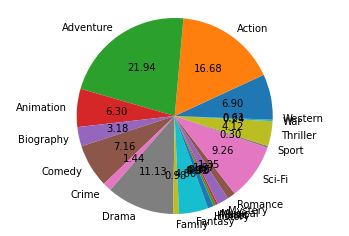

 6.90
Action 16.68
Adventure 21.94
Animation 6.30
Biography 3.18
Comedy 7.16
Crime 1.44
Drama 11.13
Family 0.98
Fantasy 4.80
History 0.97
Horror 0.01
Music 0.40
Musical 0.35
Mystery 1.87
Romance 1.35
Sci-Fi 9.26
Sport 0.30
Thriller 4.12
War 0.24
Western 0.61
99.99999999999999


In [171]:
import numpy as np
import matplotlib.pyplot as plt
total = np.array(total)
plt.pie(total,labels = genre,autopct = '%.2f')
plt.axis('equal')
plt.show()
ans = np.true_divide(total,total.sum(axis = 0,keepdims = True))*100
for i in range(len(genre)):
    print(genre[i],format(ans[i],'.2f'))
print(sum(ans))

In [172]:
## IMDB genre earning by ME
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
data = pd.read_sql_query('select * from earning',db)
data['total'] = data['Domestic'] + data['Worldwide']
data.to_sql('earning',db,if_exists = 'replace')
cur.execute('select distinct genre,sum(total) from genre join earning on genre.movie_id = earning.movie_id group by genre')
genre = []
total = []
for i in cur:
    if i[0] != '':
        genre.append(i[0])
        total.append(i[1])
genre = np.array(genre)
total = np.array(total)
plt.pie(total,labels = genre,autopct = '%.2f')
plt.show()
ans = np.true_divide(total,total.sum(axis = 0,keepdims = True))*100
for i in range(len(genre)):
    print(genre[i],format(ans[i],'.2f'))

DatabaseError: Execution failed on sql 'DROP TABLE "earning"': database is locked

Drama 11.96
Adventure 23.57
Action 17.91
Comedy 7.69
Biography 3.42
Sci-Fi 9.95
Thriller 4.42
Animation 6.77
Romance 1.45
Crime 1.55
Mystery 2.01
Fantasy 5.15
History 1.04
Family 1.05
Music 0.43
Sport 0.32
Horror 0.01
Western 0.65
War 0.25
Musical 0.38


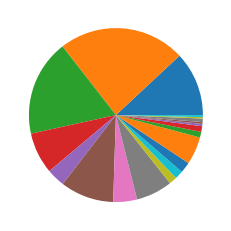

In [176]:
## IMDB genre earning by doubt support
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')

imdb = pd.read_sql_query('select * from IMDB', db)
earning = pd.read_sql_query('select * from earning', db)
genre = pd.read_sql_query('select * from genre', db)

df = earning.copy()
df['Total Earning'] = df['Domestic'] + df['Worldwide']

df1 = pd.merge(df, imdb, on = 'Movie_id', how = 'inner')
df2 = pd.merge(df1, genre, on = 'Movie_id', how = 'inner')
df2['genre'].replace('', np.nan, inplace = True)
df2['genre'].dropna()

a = df2['genre'].value_counts().index

arr = []
for i in a:
    b= df2.loc[df2['genre'] == i]
    q = b['Total Earning']
    q = np.array(q, dtype = np.int64)
    c = q.sum()
    arr.append(c)
    
for i in range(len(arr)):
    per = arr[i] / sum(arr) * 100
    print(a[i], format(per, '.2f'))
    
plt.pie(arr)
plt.show()

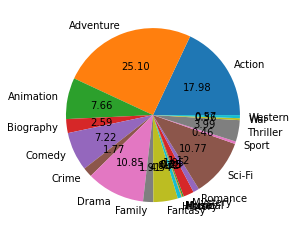

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [180]:
# IMDB genre Budget
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
cur.execute('select distinct genre,sum(budget) from genre join IMDB on genre.movie_id = IMDB.movie_id group by genre')
genre = []
budget = []
for i in cur:
    if i[0] != '':
        genre.append(i[0])
        budget.append(i[1])
genre = np.array(genre)
budget = np.array(budget)
plt.pie(budget,labels = genre,autopct = '%.2f')
plt.show()
ans = np.true_divide(budget,budget.sum(axis = 0,keepdims = True))*100
for i in range(len(genre)):
    print(genre[i],format(ans[i],'.2f'))

In [209]:
# IMDB Year Top
import numpy as np
import pandas as pd
import matplotlib as plt
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
data = pd.read_sql_query('select title,total from IMDB join earning on IMDB.movie_id = earning.movie_id group by total',db)
df = data.copy()


In [318]:
#IMDB profit
import pandas as pd
import numpy as np
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
earning = pd.read_sql_query('select * from earning',db)
imdb = pd.read_sql_query('select * from IMDB',db)

df = pd.merge(earning,imdb,on = 'Movie_id',how = 'inner')
df['Budget'].replace('',np.nan,inplace = True)
df['Budget'].dropna()
df['net_profit'] = df['total'] - df['Budget']
ans = df['net_profit'].max()
getans = df[df['net_profit'] == ans]['Title']
str(getans)[6:34]

'Star Wars: The Force Awakens'

In [324]:
#IMDB least Budget
import pandas as pd
import numpy as np
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()
earning = pd.read_sql_query('select * from earning',db)
imdb = pd.read_sql_query('select * from IMDB',db)

df = pd.merge(earning,imdb,on = 'Movie_id',how = 'inner')
df['Budget'].replace('',np.nan,inplace = True)
df['Budget'].dropna()
df['net_profit'] = df['total'] - df['Budget']
ans = df['Budget'].min()
getans = df[df['Budget'] == ans]
getans

,level_0,index,Movie_id,Domestic,Worldwide,total,Title,Rating,TotalVotes,MetaCritic,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,net_profit
71,71,71,30154,1013100,1013100.0,2026200.0,Short Term 12 (2013),8.0,63459,82,...,7.7,7.9,7.7,7.7,8.0,8.5,7.0,8.3,7.9,1026200.0
109,109,109,20709,22321,22321.0,44642.0,Tyrannosaur (2011),7.6,26016,65,...,7.6,7.5,7.5,7.4,5.8,6.5,7.4,7.6,,-955358.0


In [328]:
#IMDB Year Top
cur.execute('select title,total from IMDB join earning on IMDB.movie_id = earning.movie_id order by total')
for i in cur:
    print(i[0],i[1])

Tyrannosaur (2011) 44642.0
Detachment (2011) 145378.0
I, Daniel Blake (2016) 520708.0
Short Term 12 (2013) 2026200.0
Disconnect (2012) 2873800.0
Flipped (2010) 3510424.0
Tucker and Dale vs Evil (2010) 4973354.0
Pride (2014) 8970268.0
What We Do in the Shadows (2014) 9732448.0
Hunt for the Wilderpeople (2016) 10410936.0
Captain Fantastic (2016) 11759472.0
Me and Earl and the Dying Girl (2015) 15833165.0
Sing Street (2016) 16861640.0
Before Midnight (2013) 19291096.0
Amour (2012) 26578984.0
Warrior (2011) 36714230.0
Nebraska (2013) 45337784.0
The Perks of Being a Wallflower (2012) 51127075.0
Whiplash (2014) 62074041.0
Ex Machina (2014) 62312372.0
Hell or High Water (2016) 64887721.0
Boyhood (2014) 69847562.0
Nightcrawler (2014) 71078434.0
Her (2013) 72919502.0
50/50 (2011) 74201975.0
127 Hours (2010) 79074027.0
Scott Pilgrim vs. the World (2010) 79188834.0
Dallas Buyers Club (2013) 82496570.0
End of Watch (2012) 89129755.0
The Book Thief (2013) 98074797.0
The Little Prince (2015) 9891040